In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
print(tf.__version__)


2.15.0


In [ ]:
import pathlib
import subprocess
import os

# Roboflow 데이터셋 다운로드 명령어
dataset_url = "https://universe.roboflow.com/ds/ybiXyz2KFD?key=fes4FpozN0"

download_command = f'curl -L "{dataset_url}" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip'

# 현재 작업 디렉토리 변경
os.chdir("/content/")

# 다운로드 명령어 실행
subprocess.run(download_command, shell=True)

# 압축 해제된 데이터셋 디렉토리 경로
data_dir = pathlib.Path("/content/dataset")

In [ ]:
import subprocess
import pathlib

# 데이터 다운로드 및 압축 해제 명령어
kick_command = 'curl -L "https://universe.roboflow.com/ds/ybiXyz2KFD?key=fes4FpozN0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip'

# 터미널 명령어 실행
subprocess.run(kick_command, shell=True)

# 데이터셋이 저장된 디렉토리 경로
kick_dir = pathlib.Path("/content")

# 각 하위 디렉토리에서 .jpg 확장자를 가진 이미지 파일의 수를 세는 코드
image_count_train = len(list(kick_dir.glob('train/images/*.jpg')))
image_count_test = len(list(kick_dir.glob('test/images/*.jpg')))
image_count_valid = len(list(kick_dir.glob('valid/images/*.jpg')))

print("Train 이미지 수:", image_count_train)
print("Test 이미지 수:", image_count_test)
print("Validation 이미지 수:", image_count_valid)

Train 이미지 수: 3252
Test 이미지 수: 225
Validation 이미지 수: 451


In [ ]:
import tensorflow as tf
print("Tensorflow version:",tf.__version__)
print(help(tf.lite.TFLiteConverter))

Tensorflow version: 2.15.0
Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    optimizations: Experimental flag, subject to change. Set of optimizations to
 |      apply. e.g {tf.lite.Optimize.DEFAULT}. (default None, must be None or a
 |      set of values of type `tf.lite.Optimize`)
 |    representative_dataset: A generator function used for integer quantization
 |      where each generated sample has the same order, type and shape as the
 |      inputs to the model. Usually, this is a small subset of a few hundred
 |      samples randomly chosen, in no particular order, from the training or
 |      evaluation dataset. This is an optional attribute, but required for full
 |      integer quantization, i.e, if `tf.int8` is the only supported type in
 |      `target_spec.supp

In [ ]:
import tensorflow as tf
from tensorflow import keras
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

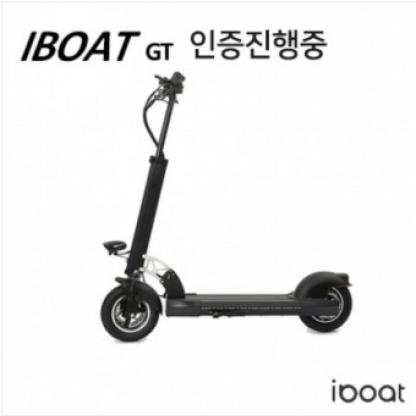

In [ ]:
from PIL import Image
import pathlib

# 데이터셋이 저장된 디렉토리 경로
data_dir = pathlib.Path("/content/")

# train/images 디렉토리 경로
train_images_dir = data_dir / "train" / "images"
valid_images_dir = data_dir / "valid" / "images"
test_images_dir = data_dir / "test" / "images"
# train/images 디렉토리 안에 있는 이미지 파일들의 경로 가져오기
train_image_paths = list(train_images_dir.glob("*.jpg"))
PIL.Image.open(str(train_image_paths[1]))
train_image_paths = list(valid_images_dir.glob("*.jpg"))
PIL.Image.open(str(train_image_paths[1]))
train_image_paths = list(test_images_dir.glob("*.jpg"))
PIL.Image.open(str(train_image_paths[1]))



In [ ]:
img_height = 224
img_width = 224

# 배치 크기
batch_size = 128

# 데이터셋 생성
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    #데이터셋이 저장된 디렉토리 경로를 의미함
    validation_split=0.2,
    #검증 데이터셋으로 사용할 비율을 지정함  -> 20가 검증 데이터 셋으로 사영된다
    subset="training",
    #데이터셋의 하위 집합을 지정한다 "training" 을 지정하면 전체 데이터셋 중에서
    #훈련  데이터셋을 선택하고 "validation" 을 지정하면 검증 데이터셋을 선택함
    seed=123,
    #데이터를 분할할때 사용하는 seed 값으로 동일한 시드 값을 사용하면 매번 동일한 데이터 분할
    #결과를 얻을 수  있음
    image_size=(img_height, img_width),
    #모델의 입력으로 제공될 이미지 크기를 지정한다. 이 매개변수는 튜플(높이, 너비) 형태로 지정
    batch_size=batch_size)
    #모델에 한 번에 제공되는 이미지 배치의 크기임
    #한번에 처리되는 이미지 개수를 말함

Found 451 files belonging to 2 classes.
Using 361 files for training.


In [ ]:
data_dir = pathlib.Path("/content/valid")
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 451 files belonging to 2 classes.
Using 90 files for validation.


In [ ]:
class_names = ['sample_data', 'test', 'train', 'valid']
print(class_names)
#데이터세트의 class names 속성에서 클래스 이름을 찾을 수 있습니다
# 이들 클래스 이름은 알파벳 순서의 디렉토리 이름에 해당된다

['sample_data', 'test', 'train', 'valid']


KeyboardInterrupt: 

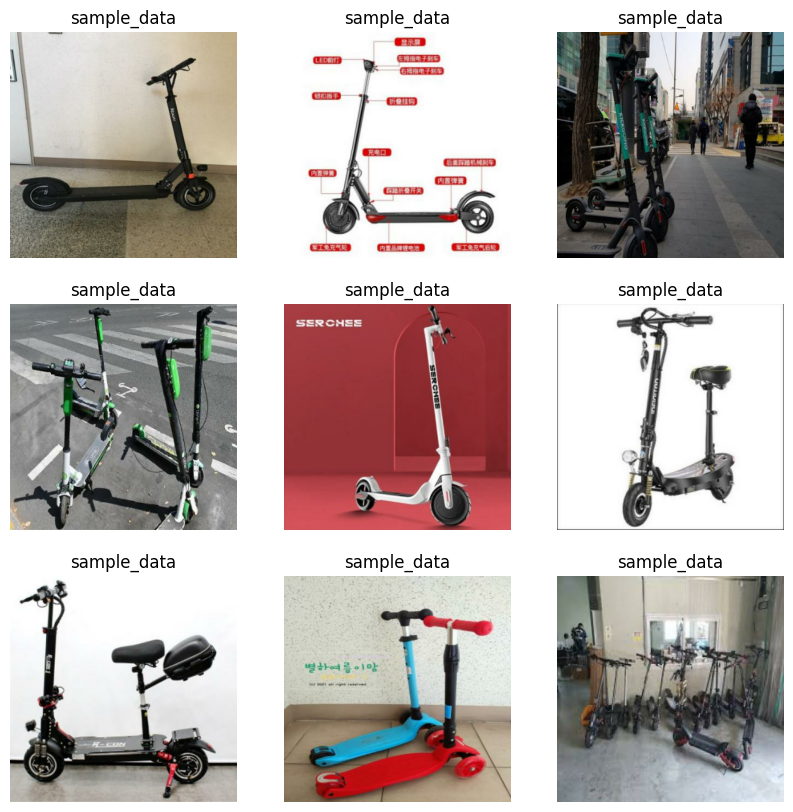

In [ ]:
import matplotlib.pyplot as plt
#matplotliv라이브러리를 임포트 한다는 말

plt.figure(figsize=(10, 10)) #새로운 플롯을 생성한다 크기를 (10,10) 으로 지정함
for images, labels in train_ds.take(1): #훈련 데이터셋에서 첫번째 배치를 가져옴 take(1)은 첫번째 배치만 가져온다
  for i in range(9):# 배치에서 처음부터 9개의 이미지를 반복적으로 가져온다
    ax = plt.subplot(3, 3, i + 1) #3x3 그리드에 이미지를 배치하기 위한 서브플롯을 생성한다
    plt.imshow(images[i].numpy().astype("uint8")) # 혀재 이미지를 시각화 한다 .numpy()를 사용하여 tensorfkow를 넘파이 배열로 변환 하고 이미지를 정수형으로 변환
    plt.title(class_names[labels[i]])# 현재 이미지의 라벨을 제목으로 설정한다
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(128, 224, 224, 3)
(128,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
#정규화 과정
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:

num_classes = len(class_names)
img_height = 224
img_width = 224

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #이미지 픽셀값을 0에서 255 범위에서 0부터 1까지 조정한다  -> 저치리 과정
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  #Con2D : 2차원 컨볼루션 레이어를 정의함. 이미지의 지역적인 패턴을 감지하기 위해 컨볼루션 연산
  layers.MaxPooling2D(),
  #MaxPooling2D(): 최대 풀링 레이어를 정의함. 이미지의 공간 차원을 중리고 계산량을 감소시킴
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  #다차원 특성 맵을 1차원 벡터로 변환-> 컨볼루션 레이어와 완전 연결 레이어 사이에서 데이터 형식을 변환하는 역활
  layers.Dense(128, activation='relu'),
  #Dense : 완전 연결 레이어를 정의합. 모든 입력 뉴런이 이전 레이어의 모든 출력 뉴련과 연결됨
  layers.Dense(num_classes)
])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터셋 경로 설정
data_dir = '/content'

# 이미지 크기 설정
img_height = 224
img_width = 224
batch_size = 32

# 데이터 로드 및 전처리
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #검증데이터를 20프로만 사용하겠다
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 데이터 증강 설정
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

# 모델 구축
num_classes = len(train_ds.class_names)

model = models.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(num_classes)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 빌드
model.build(input_shape=(None, img_height, img_width, 3))

model.summary()

# 모델 학습
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# 모델 평가
loss, accuracy = model.evaluate(val_ds)
print("Validation loss:", loss)
print("Validation accuracy:", accuracy)

Found 3928 files belonging to 4 classes.
Using 3143 files for training.
Found 3928 files belonging to 4 classes.
Using 785 files for validation.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 64)      18496     
                                         

In [ ]:
model.save('eva_geunyoung_kick_board_share.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 저장된 모델 불러오기
model_path = '/content/eva_geunyoung_kick_board_share.h5'
loaded_model = load_model(model_path)

# 이미지 경로 지정
image_path = '/content/eva.jpeg'

# 이미지 로드 및 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 모델에 맞는 입력 크기로 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # 이미지 픽셀 값을 0-1 범위로 정규화

# 이미지 분류 예측
predictions = loaded_model.predict(img_array)
class_index = np.argmax(predictions[0])

# 분류 결과 출력
class_names = ['train', 'test', 'valid']  # 클래스 이름 리스트
predicted_class = class_names[class_index]
confidence = predictions[0][class_index] * 100

print(f'The image is classified as "{predicted_class}" with {confidence:.2f}% confidence.')

1/1 [==============================] - 0s 164ms/step
The image is classified as "valid" with 100.71% confidence.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# 저장된 모델들의 경로 지정
kick_board_model_path = '/content/eva_geunyoung_kick_board_share.h5'
braille_block_model_path = '/content/eva_geunyoung_Braille _block_share.h5'

# 모델들 불러오기
kick_board_model = load_model(kick_board_model_path)
braille_block_model = load_model(braille_block_model_path)

# 이미지 경로 지정
image_path = '/content/eva.jpeg'

# 이미지 로드 및 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 모델에 맞는 입력 크기로 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # 이미지 픽셀 값을 0-1 범위로 정규화

# 이미지 분류 예측
kick_board_predictions = kick_board_model.predict(img_array)
braille_block_predictions = braille_block_model.predict(img_array)

# 분류 결과 출력
kick_board_class_index = np.argmax(kick_board_predictions[0])
braille_block_class_index = np.argmax(braille_block_predictions[0])

class_names = ['kick_board', 'braille_block']  # 클래스 이름 리스트

# 클래스 인덱스가 리스트 범위를 벗어나지 않도록 보정
kick_board_class_index = min(kick_board_class_index, len(class_names)-1)
braille_block_class_index = min(braille_block_class_index, len(class_names)-1)

kick_board_confidence = kick_board_predictions[0][kick_board_class_index] * 100
braille_block_confidence = braille_block_predictions[0][braille_block_class_index] * 100

predicted_kick_board = class_names[kick_board_class_index]
predicted_braille_block = class_names[braille_block_class_index]

print(f'In the image, Kick board is classified as "{predicted_kick_board}" with {kick_board_confidence:.2f}% confidence.')
print(f'In the image, Braille block is classified as "{predicted_braille_block}" with {braille_block_confidence:.2f}% confidence.')


1/1 [==============================] - 0s 463ms/step
In the image, Kick board is classified as "braille_block" with -207.91% confidence.
In the image, Braille block is classified as "braille_block" with -373.92% confidence.


In [6]:
import tensorflow as tf

# Load the Keras model from the H5 file
keras_model = tf.keras.models.load_model('/content/eva_geunyoung_kick_board_share.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
# Save the TFLite model to a file
tflite_model_path = '/content/eva_geunyoung_kick_board_share.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_model_path}")




TFLite model saved to: /content/eva_geunyoung_kick_board_share.tflite
